<a href="https://colab.research.google.com/github/CarlosBrys/Llamadas-911-Agresion-Personas/blob/main/911_Delitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicción de Delitos Mediante Modelos de Aprendizaje de Máquina**

Con este proyecto se propone utilizar algoritmos de aprendizaje de máquina para hallar correlaciones que permitan hacer predicciones de hechos delictivos en un momento dado del tiempo, basados en
el registro histórico de llamadas al servicio de emergencias.

**dias**: conversion de la fecha a cantidad de dias (0-365)

**Total**: 365 registros

**Conjunto de datos**:
https://drive.google.com/file/d/1IYD_pgDJVzOpwKKCltP0t9woOlE9Vc27/view?usp=sharing
Datos observados para la cantidad de llamadas diarias reportando agresión a personas

**Conjunto de validación**: https://drive.google.com/file/d/16HKqTardEP1dTRxVeG5g1g0qIU7KmDwR/view?usp=sharing
Conjunto datos aleatorios con una variación de +- 10 sobre el dato observado


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import math
import numpy

In [12]:
from google.colab import files
uploaded = files.upload()

Saving AgresionPersonasValidacion.csv to AgresionPersonasValidacion (2).csv
Saving AgresionPersonas.csv to AgresionPersonas (2).csv


In [40]:

DatosEntrenamiento = pd.read_csv('AgresionPersonas (2).csv')
DatosValidacion = pd.read_csv('AgresionPersonasValidacion (2).csv')
print(DatosEntrenamiento.shape)
print(DatosEntrenamiento.head())
print(DatosValidacion.shape)
print(DatosValidacion.head())

(365, 2)
   Dia  Llamadas
0    1       584
1    2       236
2    3       288
3    4       324
4    5       365
(121, 2)
   Dia  Llamadas
0    4       315
1    6       227
2   10       309
3   12       442
4   14       343


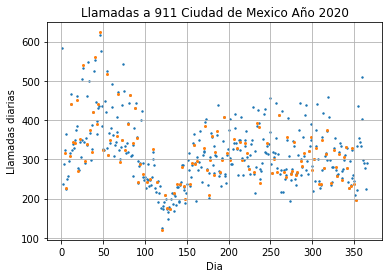

In [16]:
# Separar entre las variables de entrada (x) y salida (y) para el entrenamiento
datos_x = DatosEntrenamiento['Dia']
datos_y = DatosEntrenamiento['Llamadas']

# Separar entre las variables de entrada (x) y salida (y) para el entrenamiento
valida_x = DatosValidacion['Dia']
valida_y = DatosValidacion['Llamadas']

# Visualizar el conjunto de datos de entrenamiento
plt.title("Llamadas a 911 Ciudad de Mexico Año 2020")
plt.ylabel('Llamadas diarias')
plt.xlabel('Dia')
plt.grid()
plt.scatter(datos_x[::1], datos_y[::1], s=2) # Datos observados
plt.scatter(valida_x[::1], valida_y[::1], s=4) # Conjunto de validacion
plt.show()


In [64]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score


# Crear el modelo
model = keras.Sequential()
model.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'linear'))
model.compile(loss='mse', optimizer="adam")
model.summary()
# 
# create model
# model = keras.Sequential()
# model.add(keras.layers.Dense(20, activation="tanh", input_dim=5, kernel_initializer="uniform"))
# model.add(keras.layers.Dense(1, activation="linear", kernel_initializer="uniform"))
# model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
# model.summary()




Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 4,355
Trainable params: 4,355
Non-trainable params: 0
_________________________________________________________________


In [65]:
# Entrenar el modelo
model.fit(datos_x, datos_y, epochs=5000, batch_size=10,  verbose=2)
#model.fit(datos_x, datos_y, epochs=1000, batch_size=10,  verbose=2)



Se truncaron las últimas líneas 5000 del resultado de transmisión.
Epoch 2501/5000
37/37 - 0s - loss: 3915.7339
Epoch 2502/5000
37/37 - 0s - loss: 3901.5564
Epoch 2503/5000
37/37 - 0s - loss: 3881.0144
Epoch 2504/5000
37/37 - 0s - loss: 3911.8535
Epoch 2505/5000
37/37 - 0s - loss: 3935.2473
Epoch 2506/5000
37/37 - 0s - loss: 3898.2847
Epoch 2507/5000
37/37 - 0s - loss: 3931.3013
Epoch 2508/5000
37/37 - 0s - loss: 4024.5510
Epoch 2509/5000
37/37 - 0s - loss: 3873.1648
Epoch 2510/5000
37/37 - 0s - loss: 3876.6208
Epoch 2511/5000
37/37 - 0s - loss: 3843.3953
Epoch 2512/5000
37/37 - 0s - loss: 3877.0737
Epoch 2513/5000
37/37 - 0s - loss: 3911.6082
Epoch 2514/5000
37/37 - 0s - loss: 3878.1787
Epoch 2515/5000
37/37 - 0s - loss: 3985.4575
Epoch 2516/5000
37/37 - 0s - loss: 3863.5076
Epoch 2517/5000
37/37 - 0s - loss: 3950.2354
Epoch 2518/5000
37/37 - 0s - loss: 3861.4575
Epoch 2519/5000
37/37 - 0s - loss: 3870.0068
Epoch 2520/5000
37/37 - 0s - loss: 3861.8135
Epoch 2521/5000
37/37 - 0s - loss

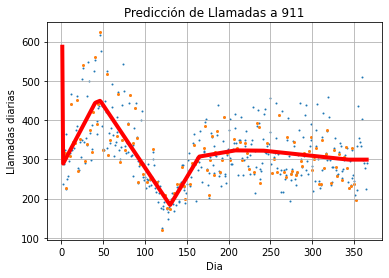

In [55]:
# Calcular la predicción del modelo
prediccion_y = model.predict(datos_x)

# Calcular la predicción de la validacion
validacion_y = model.predict(valida_x)


# Guardar las predicciones
numpy.savetxt('entrenamiento.csv', prediccion_y, delimiter=',', header='Prediccion')  # para comparar con datos_y
numpy.savetxt('validacion.csv', validacion_y, delimiter=',', header='Prediccion')  # para comparar con valida_y


# Mostrar los resultados Observados, de Control y los Predichos
plt.title("Predicción de Llamadas a 911")
plt.ylabel('Llamadas diarias')
plt.xlabel('Dia')
plt.grid()
plt.scatter(datos_x[::1], datos_y[::1], s=1)
plt.scatter(valida_x[::1], valida_y[::1], s=4)
plt.plot(datos_x, prediccion_y, 'r', linewidth=4)
plt.show()

Training Set R-Cuadrado del Conjunto de entrenamiento= 0.4438603889317779


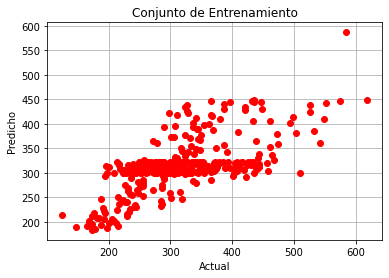

In [66]:
#Mostrar los valores actuales contra los predichos del entrenamiento
PrediccionEntrenamiento = pd.read_csv('entrenamiento.csv')
plt.plot(datos_y,PrediccionEntrenamiento,'ro')
plt.title('Conjunto de Entrenamiento')
plt.xlabel('Actual')
plt.ylabel('Predicho')
plt.grid()

#Calcular el valor de R-cuadrado para el conjunto de entrenamiento
ValorR2E = r2_score(datos_y,PrediccionEntrenamiento)
print("Training Set R-Cuadrado del Conjunto de entrenamiento=", ValorR2E)

Training Set R-Cuadrado del Conjunto de la  Validacion= 0.4477561089468748


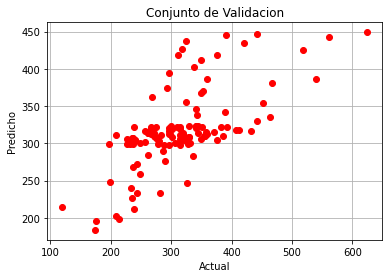

In [67]:
#Mostrar los valores actuales contra los predichos de la validacion
PrediccionValidacion = pd.read_csv('validacion.csv')
plt.plot(valida_y,PrediccionValidacion,'ro')
plt.title('Conjunto de Validacion')
plt.xlabel('Actual')
plt.ylabel('Predicho')
plt.grid()

#Calcular el valor de R-cuadrado para el conjunto de entrenamiento
ValorR2V = r2_score(valida_y,PrediccionValidacion)
print("Training Set R-Cuadrado del Conjunto de la  Validacion=", ValorR2V)